You know that a clustering algorithm calculates the distance between the points. And forms clusters of points which are closer to each other. 
For instance, let's take the RSI values of  J. P. Morgan. 

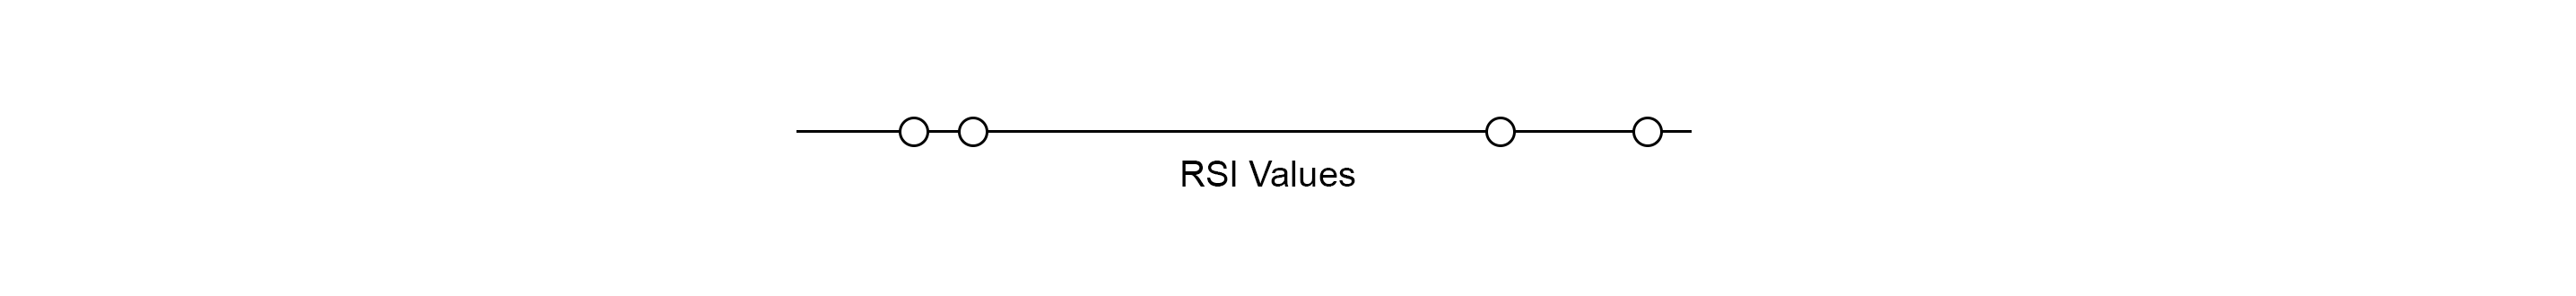

You can easily see that you can form two clusters here.

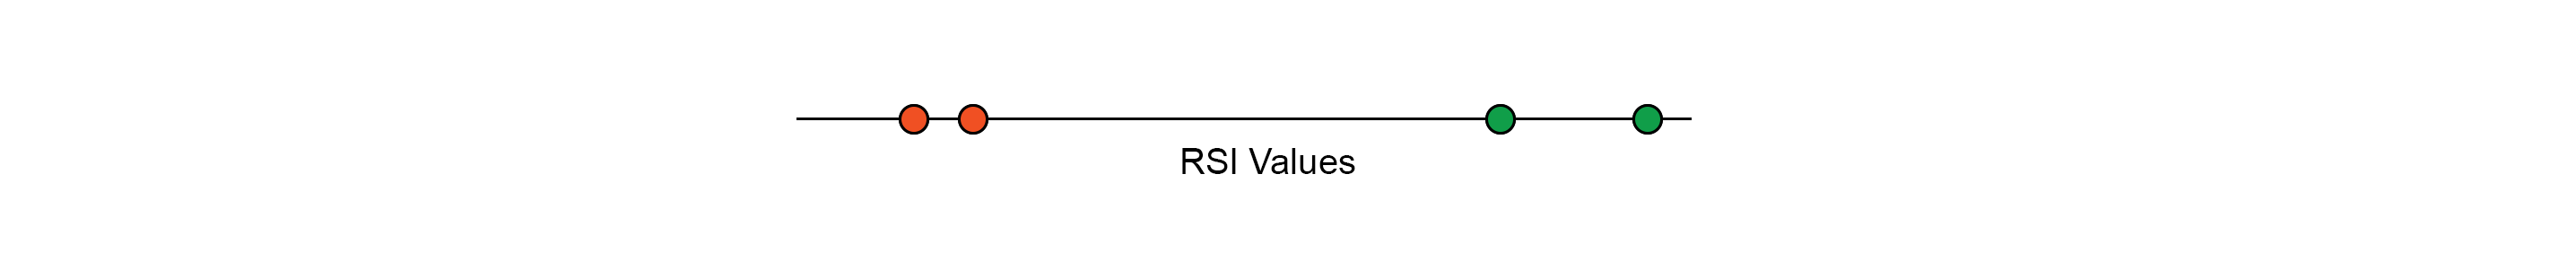

What happens if you add another feature, say ADX?

|Date|RSI|ADX|
|---|---|---|
|9 August 2021|40|25|
|10 August 2021|42|62|
|11 August 2021|60|25|
|12 August 2021|65|50|

A new axis is added to capture the ADX values. The graph becomes a 2D graph with RSI as the x-axis and ADX as the y-axis.

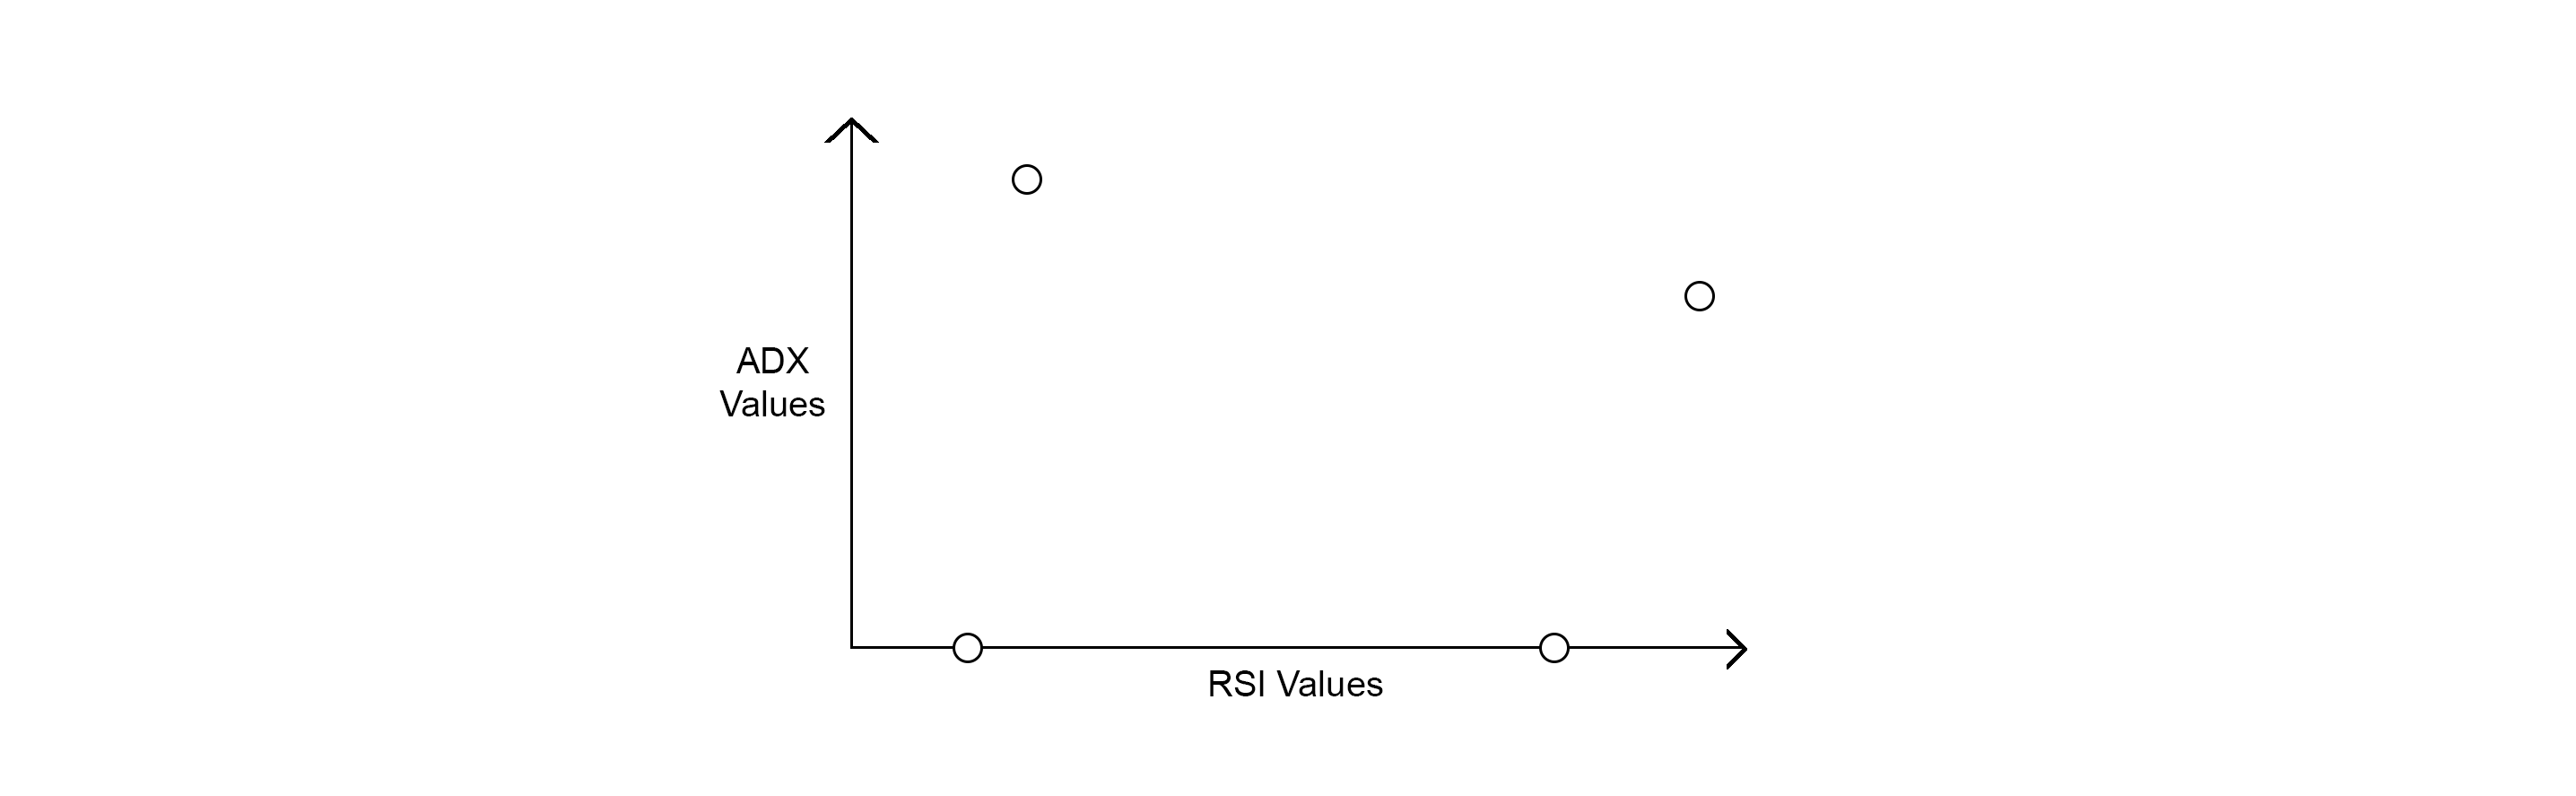

You can see that due to the addition of ADX, the data points moved away. These data points are difficult to cluster in two groups. Instead, they are clustered into four different groups.

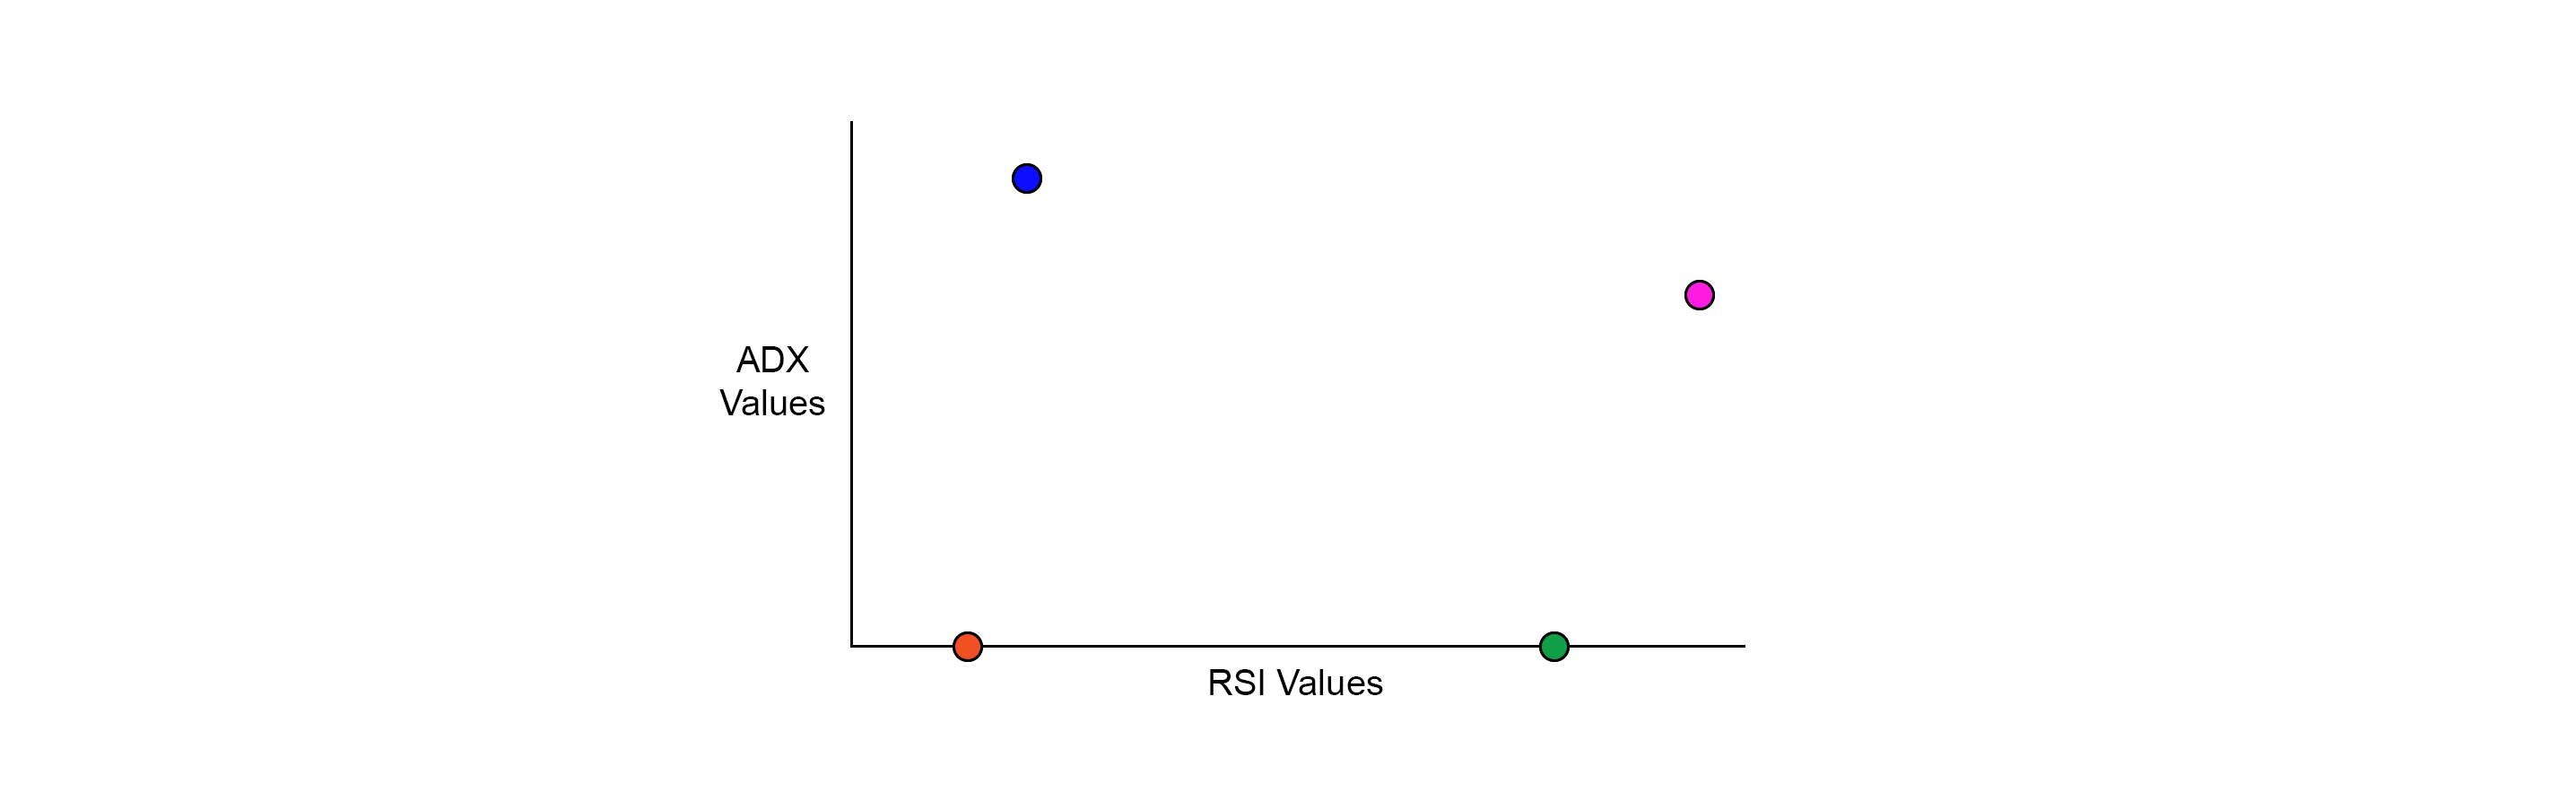

#### Why did the number of clusters increase?<br>
At first, we had calculated only one feature value, which was the RSI. Then, we added more information in the form of the ADX values. Thus, the points which were similar and clustered together became distant due to the addition of new features.
Similarly, when we add more features, the information increases and the points may move farther away.

But what is the problem in adding more information and creating more clusters?

In the RSI and ADX example, we ended up creating 4 clusters. Each cluster had only 1 data point. In the essence, we ended up with what we started. We started with 4 points and ended with 4 clusters. There was no grouping of these 4 points.
To generalise, too many dimensions or features causes each point to appear equidistant from other points. If the distances are all approximately equal, then all the observations appear equally alike (as well as equally different), and no meaningful clusters can be formed.

This is called the <b>curse of dimensionality</b>.

How do you overcome the curse of dimensionality?

One way is to eliminate the dimensions, or is it the features?

But that leads to loss of information! Let's take another example here.

The RSI and ADX values for an asset is given below.

|Date|RSI|ADX|
|---|---|---|
|9 August 2021|40|20|
|10 August 2021|45|25|
|11 August 2021|60|45|
|12 August 2021|65|50|
|13 August 2021|40|25|
|14 August 2021|45|20|
|15 August 2021|60|50|
|16 August 2021|65|45|
|17 August 2021|44|30|
|18 August 2021|65|55|

If you draw a scatter plot for these values, it looks as shown below:

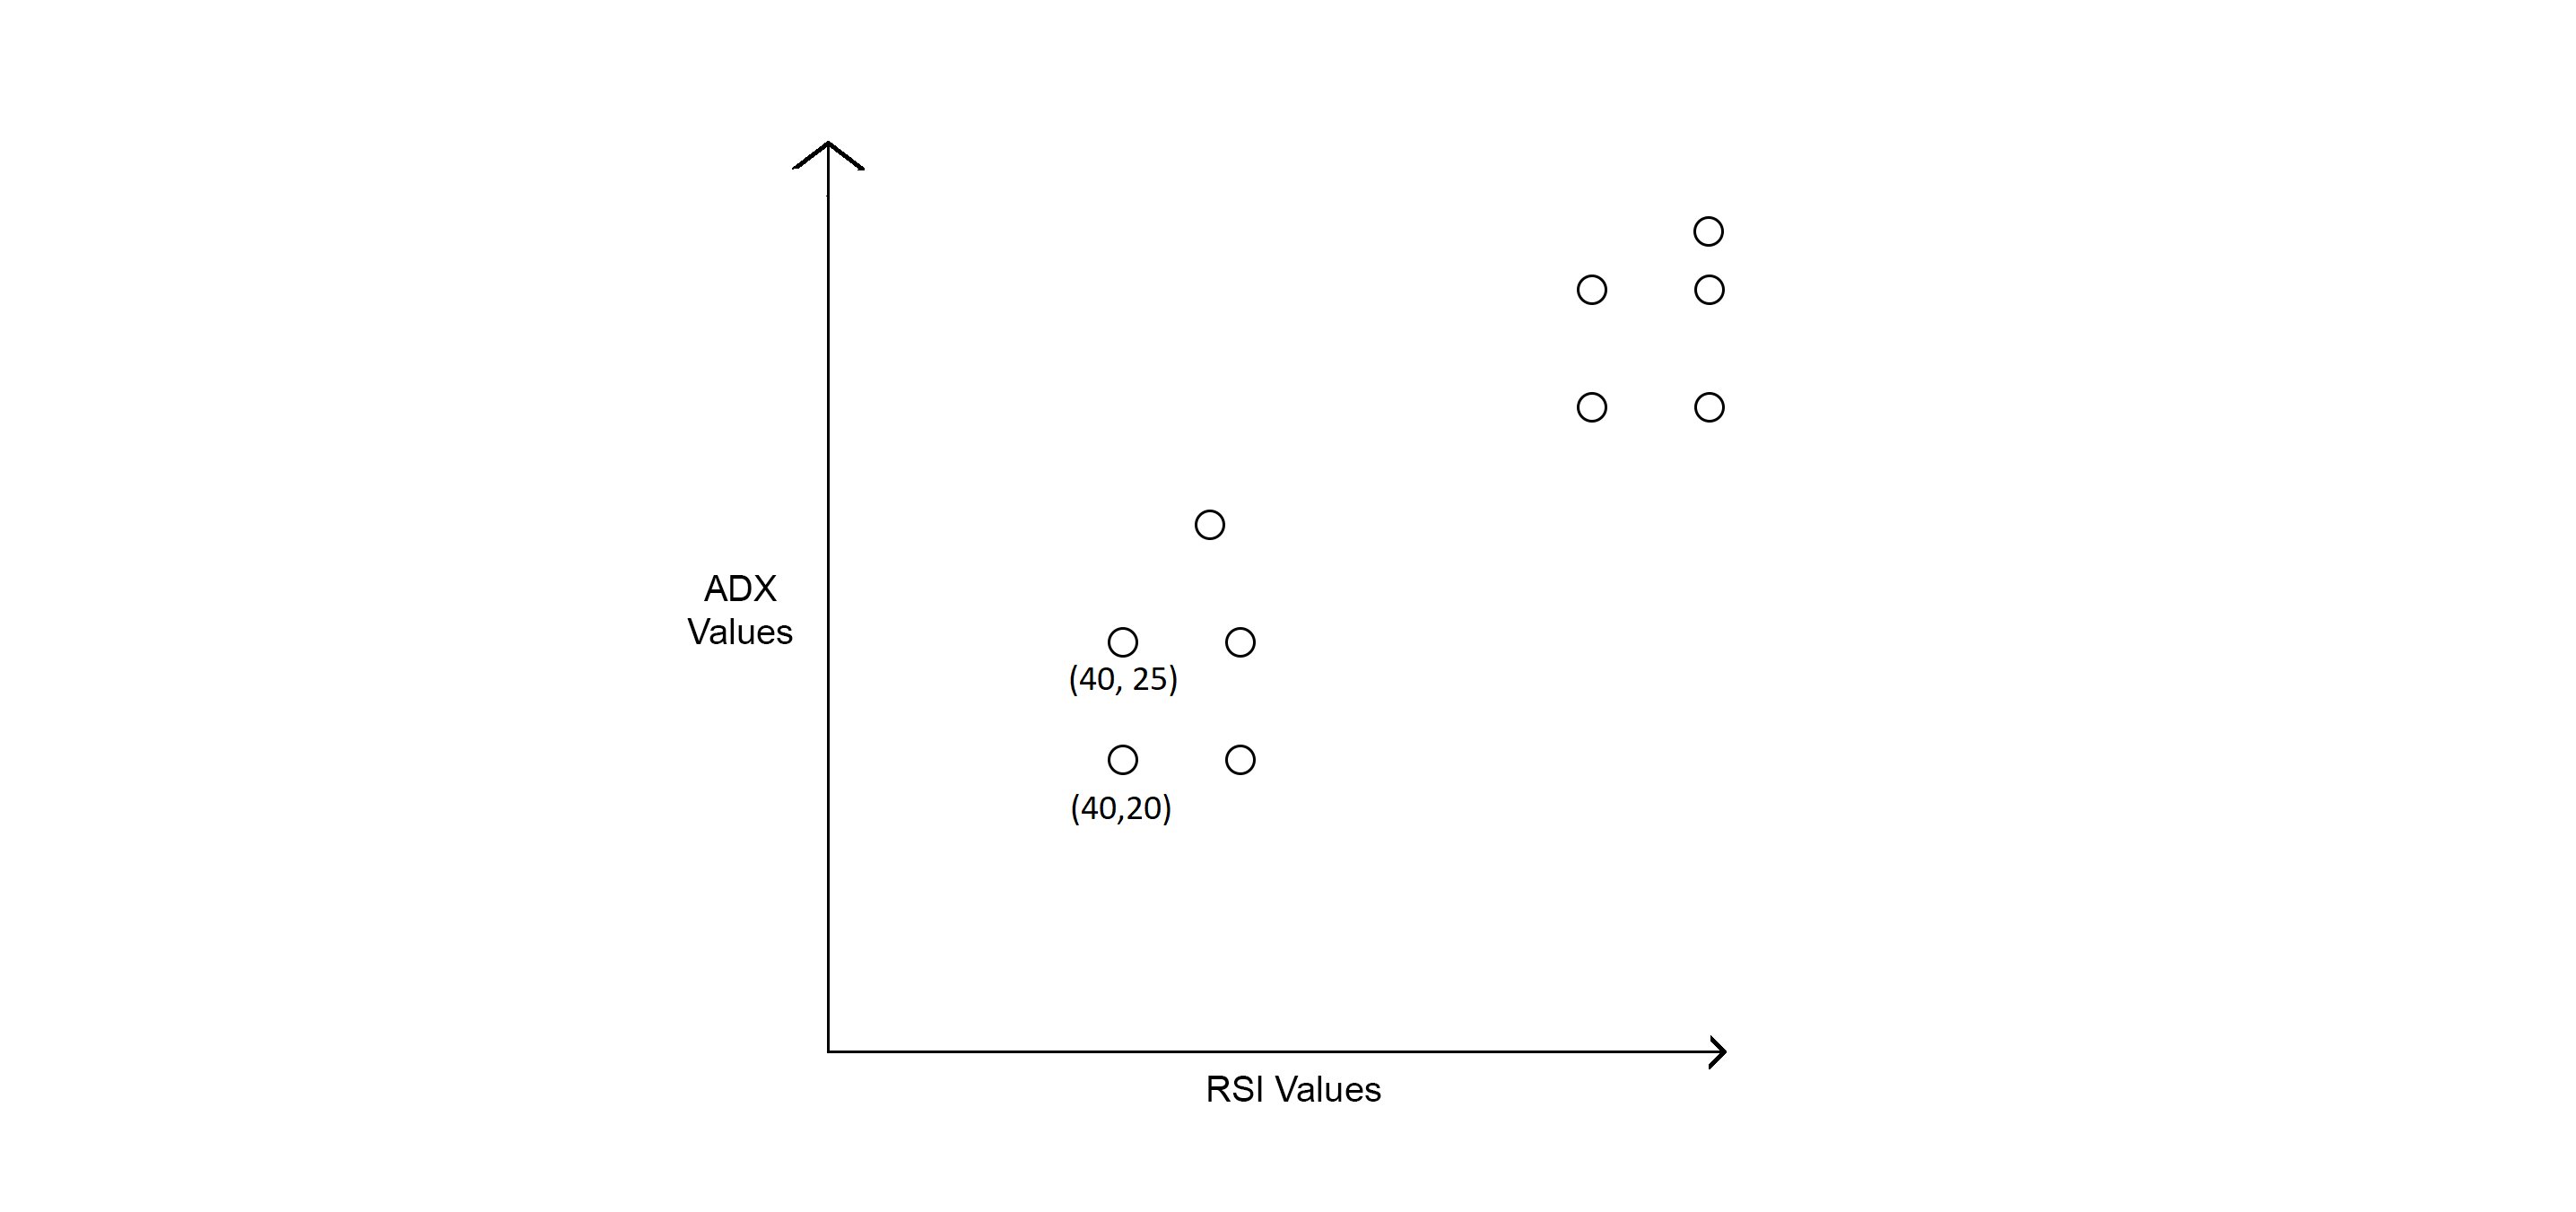

The easiest way to reduce the dimensions is to remove one of them. For example, either remove ADX or remove RSI values. But that would lead to loss of information. 

If only RSI was kept, the data point (40, 20) and (40, 25) will come together. Earlier, the two points were at a distance of 5 units from each other. But now it seems like they are the same point. Thus, the information that these two points are different and not the same is lost.

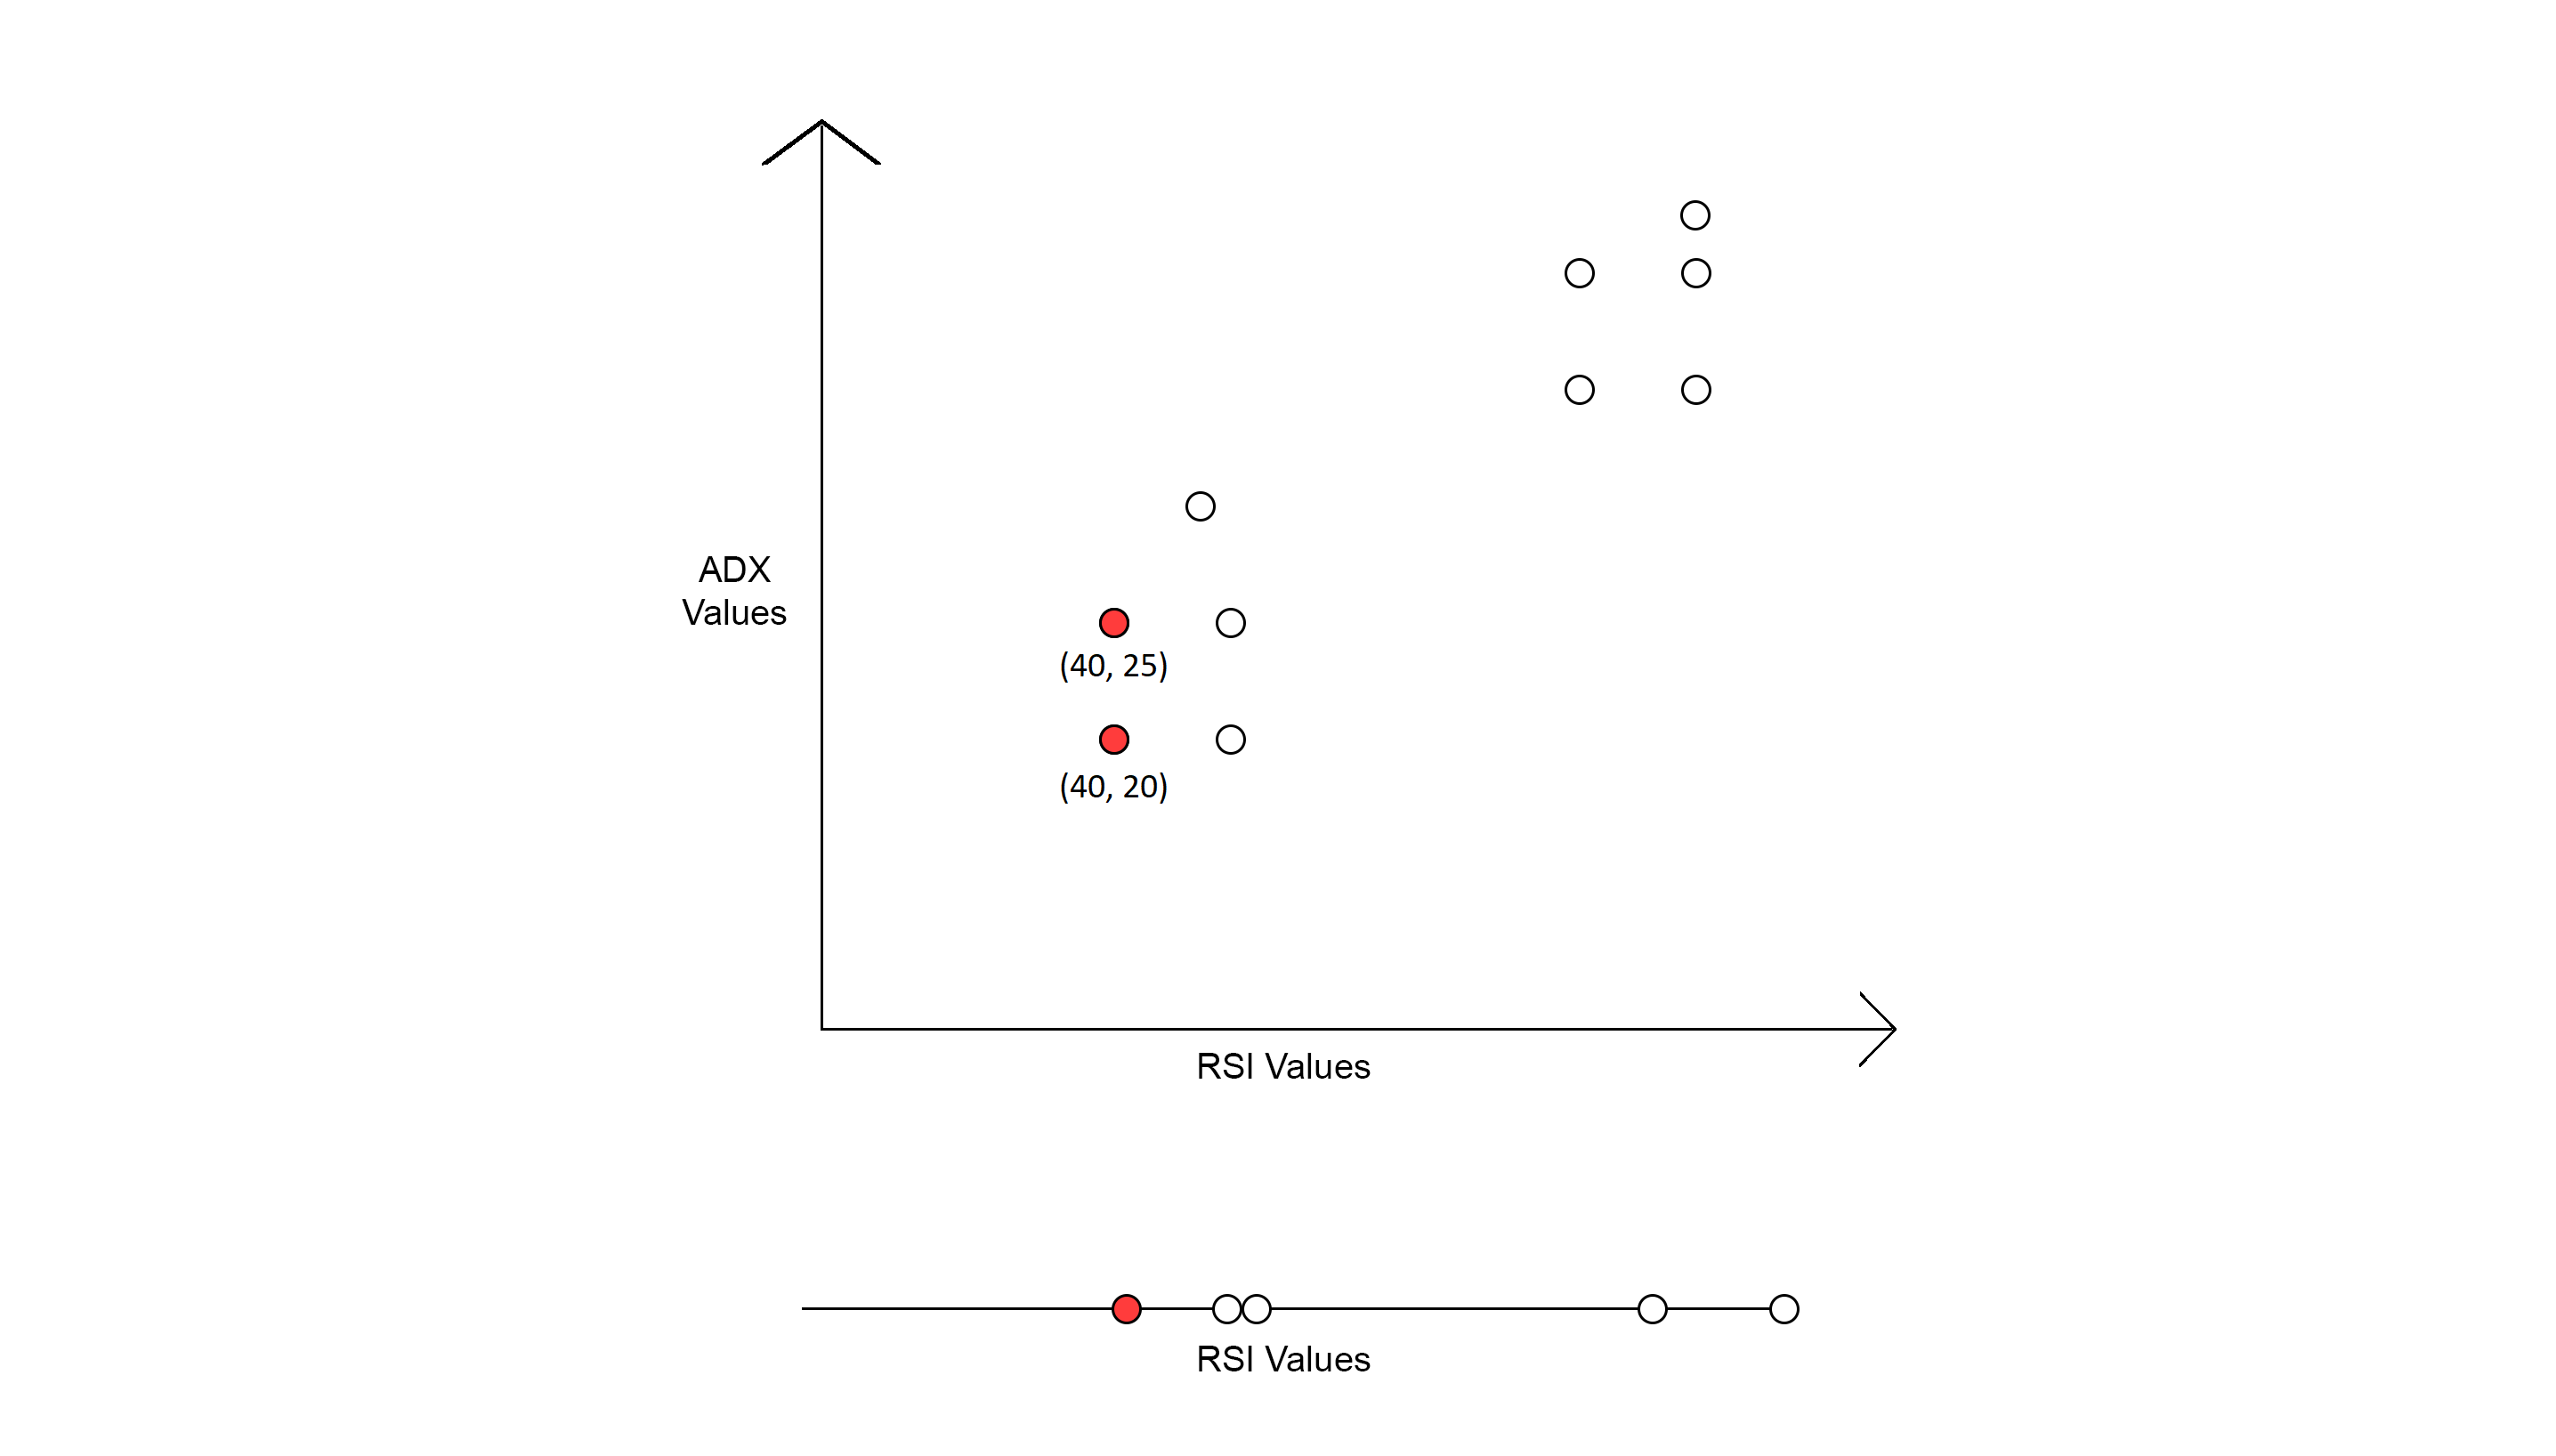

Is there a better way to reduce the dimension while keeping the loss in information at a minimum? 
Yes. Draw a line that is in between the two axes.
And then bring all the points on this line. 

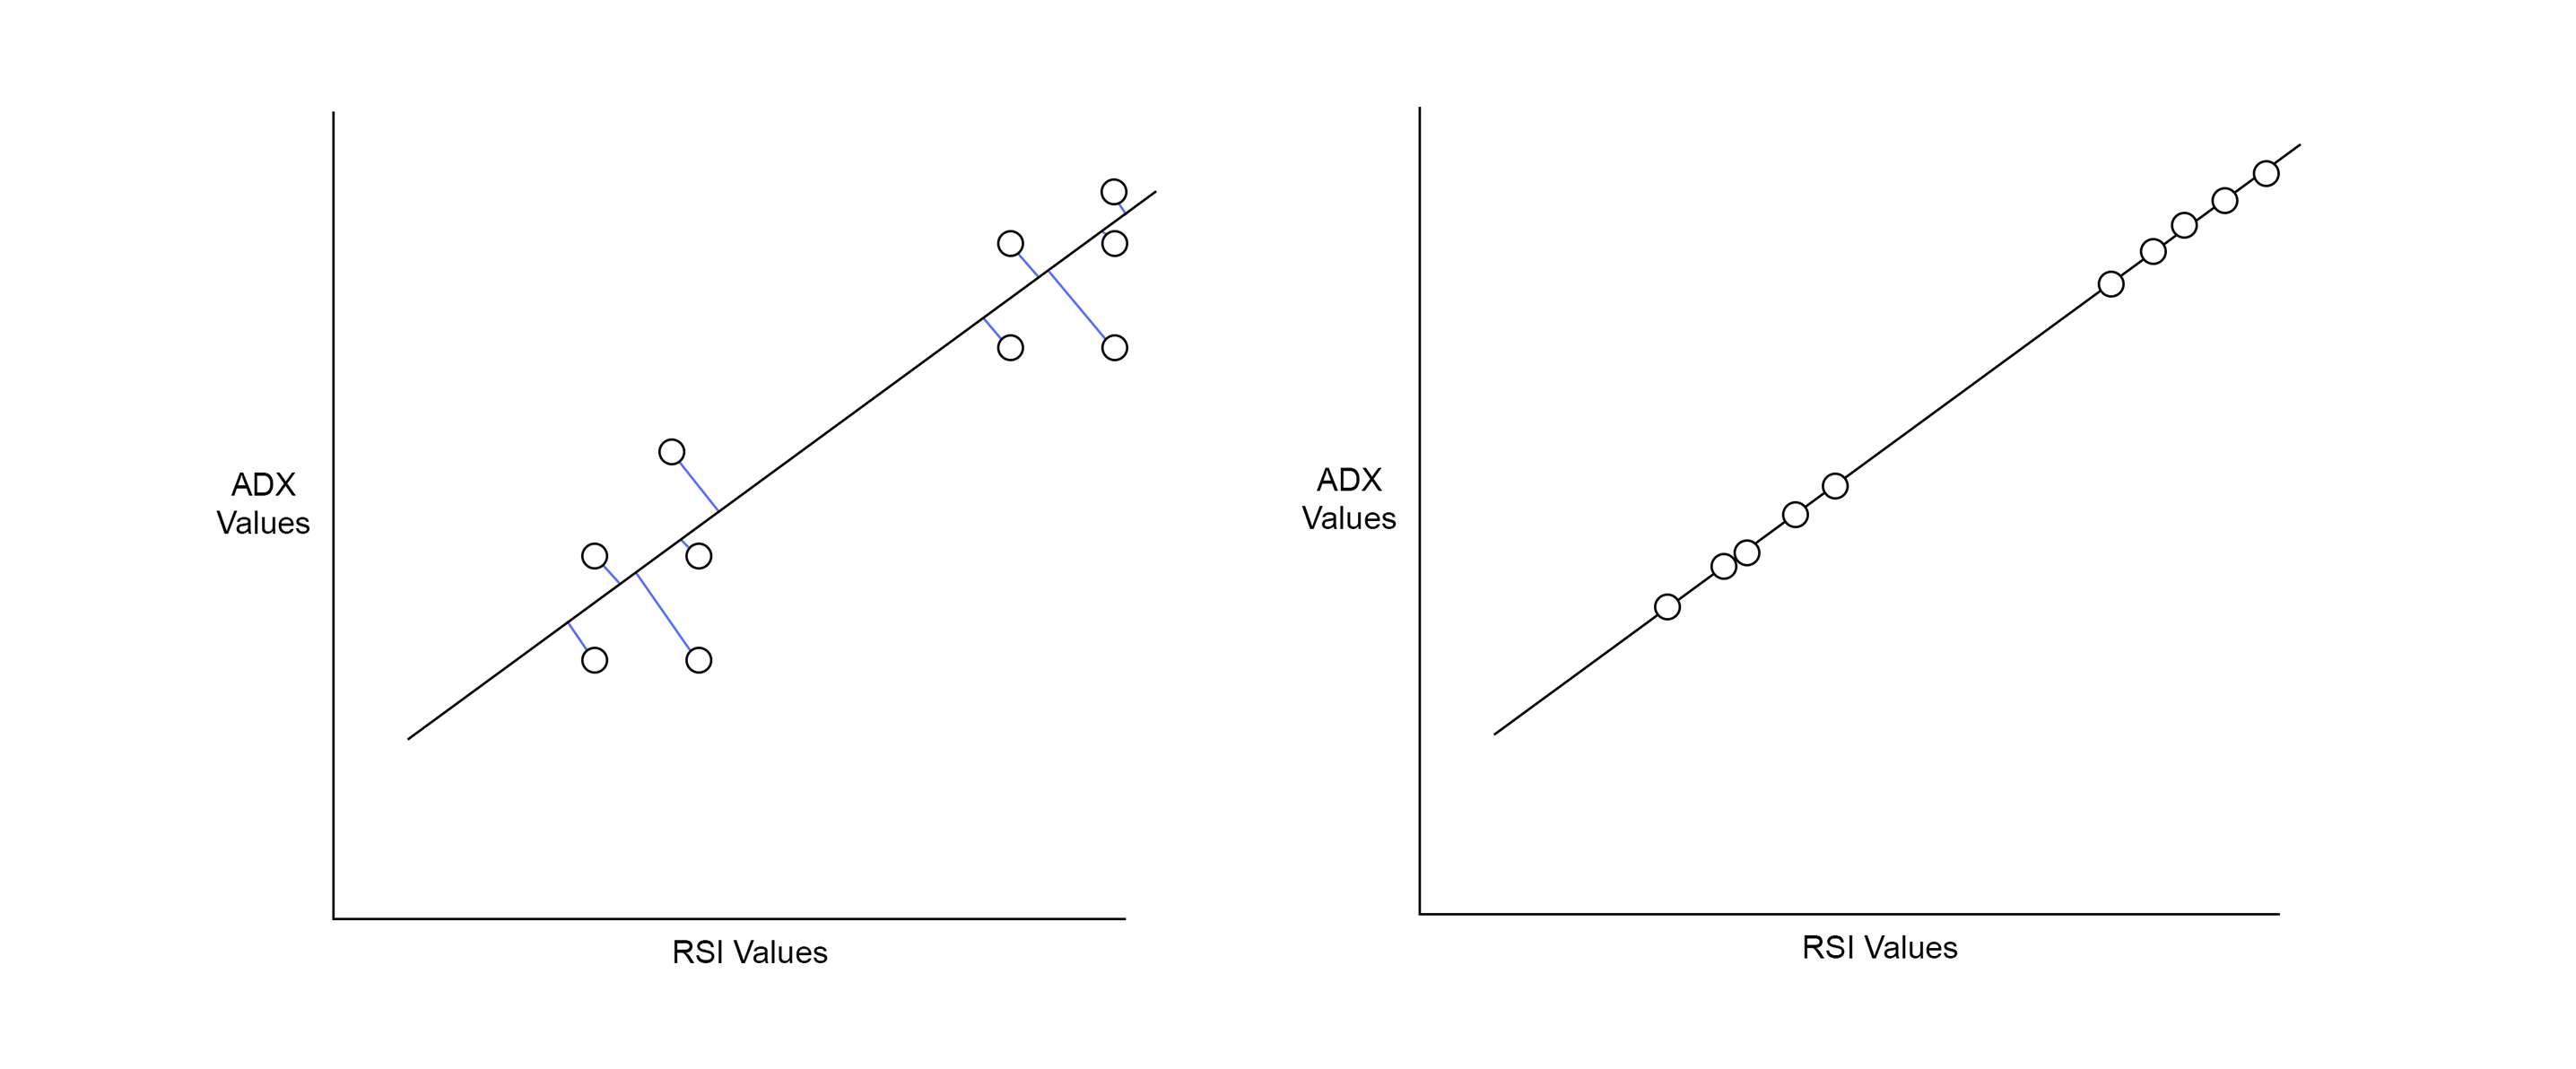

You can see that even though the points are closer on the new axis, they can still be seen distinctly. You simply rotate or straighten this line to convert the data points into a single dimension. And you managed to preserve some information of both dimensions. This is essentially what the principal component analysis does, i.e. dimensionality reduction.

Principal Component Analysis creates a new variable which contains most of the information in the original variables. An example would be that if we are given 5 years of closing price data for 10 companies, i.e. approximately (1265 * 10) data points. We would seek to reduce this number in such a way that the information is preserved. 

Of course, in the real world, there would be some information loss, and thus we use the principal component analysis to make sure that it is kept to a minimum. 

That sounds really interesting, but how do we do this exactly?

The answer is <b>EigenValues</b>. Well, that’s not the whole answer but in a way it is. Before we get into the mathematics of it, let us refresh our concepts about the matrix (no, not the movie!).

# Eigen Vectors and Covariance Matrix<br>

One of the major applications of Eigenvectors and Eigenvalues is in the image transformations. Remember how we can tilt an image in any of the photo editing apps. Well, Eigenvalues and Eigenvectors helps us in this regard.

Let's assume we have two features, shown in two dimensions, x and y. Basically, we are creating new axes, u and v, and then project the points on one of the axis, where we get maximum spread. This is done by multiplying a vector, with the matrix of features. So formally, this is what happens, for transforming matrix A and a vector v:

$$Av = \lambda v$$

The entire set of such vectors which do not change direction when multiplied with a matrix are called Eigen Vectors. The corresponding change in magnitude is called the Eigen Value. It is represented with $\lambda$ here.

Remember how we said that the ultimate aim of the principal component analysis is to reduce the number of variables. Well, Eigenvectors and Eigenvalues help in this regard. One thing to follow is that Eigenvectors are for a square matrix i.e. a matrix with an equal number of rows and columns. But they can also be calculated for rectangular matrices.

Let’s say we have a matrix A, which consists of the following elements:

|Matrix A||
|--|--|
|2|8|
|6|10|

Now, we have to find the Eigenvectors and Eigenvalues in such a manner such that:

$$Av = \lambda v$$
Where,

* v is a matrix consisting of Eigenvectors.

* $\lambda$ is the Eigenvalue.

While it may sound daunting, but there is a simple method to find the Eigenvectors and Eigenvalues.

Let us modify the equation to the following: 

$Av = \lambda Iv$ (We know that AI = A)

If we bring the values from the R.H.S to the L.H.S, then,

$$Av - \lambda Iv = 0$$

Now, we will assume that the Eigenvector matrix is non-zero. Thus, we can find $\lambda$ by finding the determinant.

Thus, $| A - \lambda I | = 0$

$(2 - \lambda)(10 - \lambda ) - (8*6) =  0$

$20 - 2\lambda - 10\lambda +\lambda^{2} - 48 = 0$

$-28 -12\lambda+ \lambda^2 = 0$

$\lambda^2 -12\lambda - 28 = 0$

$(\lambda - 14)(\lambda +2) = 0$

$\lambda = 14, -2$

Hence, we can say that the Eigenvalues are 14, -2.

Taking the $\lambda$ value as -2. We will now find the Eigenvector matrix.

Recall that, $Av = \lambda v$.

$$ A = \begin{bmatrix}
  2 & 6  \\
  8 & 10  \\
\end{bmatrix} $$

$$v = 
    \begin{bmatrix}
  x  \\
  y   \\
\end{bmatrix}$$
Therefore,

(2x + 6y) = -2x

(8x + 10y) = -2y

(4x + 6y) = 0

(8x + 12y) = 0

Since they are similar, solving them to get:

2x + 3y = 0, x = (-3/2)y

x = -3, y = 2

Thus, the Eigenvector matrix is:  

\begin{bmatrix}
    -3  \\
    2   \\
    \end{bmatrix}


Similarly, for $\lambda$ = 14, the Eigenvectors are x =1, y = 2.

That’s awesome! We have understood how Eigenvectors and Eigenvalues are formed.

Now that we know how to find the Eigenvalues and Eigenvectors, let us talk about their properties. 

In our earlier example, we had a 2 x 2 matrix. This can be considered as 2 dimensions. One of the great things about Eigenvectors and Eigenvalues is that they are used for “Orthogonal Transformations” which is a fancy word for saying that the variables are shifted in another axis without changing the direction. Let us take a visual example of this.

![First-Diagram.jpg](attachment:First-Diagram.jpg)

Let’s say we have a graph with certain points mapped on the x and y axis. Now you can locate them by giving the (x, y) coordinates of a point, but we realise that there can be another efficient way to display them meaningfully.

What if we draw a line in such a way that we can locate them using just the distance between a point on this new line and the points. Let’s try that now.

![Second-Diagram.jpg](attachment:Second-Diagram.jpg)

Let us say that the green lines represent the distance from each point to the new line. Furthermore, the distance from the first point on the line projected, i.e. A, to the last point’s projection on the new line, i.e. B, is referred to as the spread here. In the above figure, it is denoted as the red line. The importance of spread is that it gives us information on how varied is the data set. The larger the value, the easier it is for us to differentiate between two individual data points.

We should note that if we had variables in two dimensions, then we will get two sets of Eigenvalue and Eigenvectors. The other line would actually be perpendicular to the first line.

![Third-Diagram.png](attachment:Third-Diagram.png)

Now, we have a new coordinate axis which is much more suited to the points, right?

Since we are used to seeing the axes in a particular manner, we will rotate them and keep it as shown in the below diagram.

![Fourth-Diagram.png](attachment:Fourth-Diagram.png)

If we had to explain Eigenvectors and Eigenvalues diagrammatically, we can say that the Eigenvectors gives us the direction in which it is stretched or transformed and the Eigenvalues is the value by which it is stretched. In that sense, the points projected on the horizontal line gives us more information when it comes to the spread than the points being projected on the vertical line.

![Fifth-Diagram.png](attachment:Fifth-Diagram.png)

But why is this important to understand?

When we said the Eigenvalues gives us the value by which the points are stretched, we should add further that the Eigenvalues with the corresponding larger number gives us more information than the one with the lesser valued Eigenvalue.

Oh, wait! This chapter talks about Principal Component Analysis. Well, the Eigenvalues and Eigenvectors are actually the components of the data.

But there is one missing part of the puzzle left. As we have seen the illustration, the data points were bunched together, and hence the distance between the points was not that significant. 

But what if we were trying to compare stock prices, one whose value was less than $10 and another which was more than \\$500? Obviously, the variation in the price itself would lead to a different result. Hence, we try to find a way to standardise the data. And since we are trying to find the difference, we can use the covariance matrix. 

Before we go to covariance, let us see what is variance.


## What is variance?<br>

Variance tells us how much the values are far from the mean or average value.

The formula for variance is given as:

$$
Variance (\sigma^2) = \frac{\sum_i^n \left(x_i-\bar x\right)^2}{N}
$$

For example, there are three points, 155, 146, 152. 


The average of these three points is 151.
Using the formula, the variance is:

$$
Variance (\sigma^2) = \frac{(155-151)^2 + (146-151)^2 + (152-151)^2}{3} = 14
$$

Why did we square the difference?

The first reason is that if we had simply taken the difference, it would lead to the numerator becoming 0. Also, squaring the difference helps us give more weightage to the points which are farther from the mean.
Thus, the point 146 is 5 points away from 151 and that leads to the value of 25. Whereas, 152 is merely one point away and thus, its square is only 1. 

Another reason is that squaring helps us give same weightage to points which are above or below the mean. A data point that is 2 units away from the mean should have the same weightage irrespective of whether it is above or below the mean price. Squaring the difference helps us achieve that.

## Covariance

Covariance is calculated using the below formula:
$$
Cov (X, Y) = \frac{\sum_i (x_i-Xmean)( y_i - Ymean)}{N}
$$

Cov (X, Y)  = Covariance between X and Y</br>

Xi = Various observations of X</br>

Xmean = Average value of X</br>

Yi = Various observations of Y</br>

Ymean = Average value of Y</br>

N = Number of observations</br>

In the resulting covariance matrix, the diagonal elements represent the variance of the stocks.

Also, the covariance matrix is symmetric along the diagonal, meaning:

$$\sigma_{21} = \sigma_{12}$$

Thus, in this manner, we can find the variance as well as the covariance of a dataset. 

Let us assume that we had two features, RSI and ADX. The covariance matrix would be represented as follows:

||RSI|ADX|
|---|---|---|
|RSI| 120|142|
|ADX|142|190|

All right. So we know that Principal component analysis acts as a compression tool and seeks to reduce the dimensions of data in order to make computing easier. We also saw how Eigenvectors and Eigenvalues make the original matrix simpler. Further, we know that covariance simplifies the whole aspect of finding Eigenvalues and Eigenvectors to a great deal. 

Now recall that initially, we talked about how Principal component analysis seeks to reduce the dimensions by converting two variables into one, by creating a new feature altogether. Do you see a picture forming in your head about how we can use it in trading?

Let’s say we find the Eigenvalues and Eigenvectors of the covariance matrix, we will say that the largest Eigenvalue has the most information about the covariance matrix. Thus, we can keep majority of the Eigenvalues and their corresponding Eigenvectors and still be able to contain most of the information which was present in the covariance matrix. 

If we had selected 4 Eigenvalues and their corresponding Eigenvectors, we will say that we have chosen 4 Principal components. 

That’s all there is to it. Now to take the earlier example, if we had chosen the Eigenvalue 14, we would lose some information but it simplifies the computation by a great deal and in that sense, we have reduced the dimension of the variables.

Whew! We have actually understood how the Principal Component Analysis works. If we have to add another note here and try to reinforce the use of Eigenvectors in PCA, we can see that the sum of the Eigenvalues of the covariance matrix is approximately equal to the sum of the total variance in our original matrix.

But there is still one question in mind.

#### When to use Principal Component Analysis?

Suppose you are dealing with a large dataset which is computationally heavy, then you can use Principal component Analysis. In fact, it could help us a great deal in the strategy for pairs trading. Let’s try that, shall we?

# Principal Component Analysis in Trading

Luckily for us, we don’t have to code the whole logic of the Principal Component Analysis in Python. We will simply import the sklearn library and use the PCA function already defined. 

Since we are looking for global implementation, we will use the stocks listed on the NYSE. 

Since we will be working on the data for a lot of companies, we have created a csv file which contains tickers for 20 companies listed on the NYSE. For the time being, we will import their `Adjusted Close Price`. The code is as follows:

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

# Plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Importing the machine learning libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn import preprocessing
from statsmodels.tsa.stattools import coint

# Import the dataset
df = pd.read_csv("pca.csv",index_col=0)
df.head()

,GOOG,GOOGL,AMZN,MA,BA,C,ABT,CRM,COST,ACN,AVGO,MMM,CVS,FIS,SYK,MDLZ,CI,CME,ISRG,COP
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,1065.000000,1073.209961,1189.010010,148.906738,282.886383,66.456902,55.270180,104.410004,177.262619,145.510391,231.258133,209.198364,65.703430,90.138031,151.780838,39.286922,200.766891,131.867477,375.250000,49.867218
2018-01-03,1082.479980,1091.520020,1204.199951,150.778992,283.801239,66.662445,55.392387,105.290001,179.389923,146.181931,233.787170,209.189468,65.417442,90.667137,152.636368,39.444405,204.136826,133.980453,383.820007,50.786686
2018-01-04,1086.400024,1095.760010,1209.589966,152.729645,282.724396,67.484688,55.298374,106.680000,177.996857,147.912842,233.865082,211.923889,67.142265,91.340523,152.588287,39.537041,205.207260,135.410294,376.920013,51.372623
2018-01-05,1102.229980,1110.290039,1229.140015,155.895767,294.322296,67.395294,55.458187,108.099998,176.726089,149.132996,235.250839,213.575165,70.109261,91.859985,154.818405,40.046532,208.686172,136.293716,379.010010,51.273472
2018-01-08,1106.939941,1114.209961,1246.869995,156.367020,295.570740,66.608818,55.298374,108.860001,177.413223,150.324783,235.813828,212.882675,69.501572,92.090866,156.933121,39.842739,206.376816,138.188080,391.859985,51.796291


Since we will be working on daily returns, we write the code as follows:

In [ ]:
data_daily_returns = df.pct_change()
data_daily_returns.dropna(inplace=True)

If we have to check the number of rows and columns of the array, we use the following code:

In [ ]:
data_daily_returns.shape

(501, 20)

Here, we understand that there are 20 columns corresponding to the number of companies we have selected and 501 is the data points we have of each company. Moving ahead, we will now use the Principal Component Analysis code. Since we are trying to reduce the variables, let’s keep the number of Principal components as 18.

In [ ]:
N_PRIN_COMPONENTS = 18
pca = PCA(n_components=N_PRIN_COMPONENTS)
pca.fit(data_daily_returns)

PCA(n_components=18)

You can check the number of rows and columns in the array with the “shape” command. 

In [ ]:
pre_process = pca.components_.T 
pre_process.shape

(20, 18)

You can see that we have gone from 501 to 20. Now, we have to use this for trading. First we will scale the data.

In [ ]:
# Using transpose on the dataset
X = pca.components_.T
X.shape

# Scaling the dataset
X = preprocessing.StandardScaler().fit_transform(X)
print(X.shape)

(20, 18)


In [ ]:
# Using k-means algorithm on dataset
clf = KMeans(n_clusters=4, init='k-means++', max_iter=30,
             n_init=10, random_state=7)
print(clf)

# Using the fit function
clf.fit(X)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters discovered: %d" % n_clusters_)

clustered = clf.labels_

KMeans(max_iter=30, n_clusters=4, random_state=7)

Clusters discovered: 4


To visualise it, we would use the t-SNE tool which is used to visualise high dimensional data into a 2D data.

The exact code is as follows:

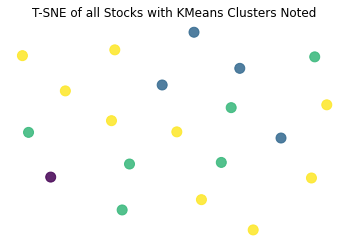

In [ ]:
clustered_series = pd.Series(index=data_daily_returns.columns, 
                             data=clustered.flatten())
clustered_series_all = pd.Series(
                            index=data_daily_returns.columns,
                            data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

X_tsne = TSNE(learning_rate=1000, perplexity=25, 
              random_state=1337).fit_transform(X)


plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1]
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with KMeans Clusters Noted');

You can see that there are 4 clusters formed. While it may look like they are spread out, the t-SNE tool has visualised the clusters in a 2 dimensional space, and hence you can't see the clusters grouped together. 

Once these clusters are formed, you can use them further for analysis or your own trading strategy.

Great! We have not only seen two unsupervised algorithms, but we have also seen how to overcome the curse of dimensionality. In the next chapters, we lean back a bit and try to understand the concepts of natural language processing and reinforcement learning.